In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import Model, Input
from keras.layers import Dense

In [69]:
ds=sns.load_dataset('titanic')

In [70]:
ds.head()
ds['sex'] = ds['sex'].replace(['male', 'female'], [0,1])

In [71]:
ds['alive'] = ds['alive'].replace(['yes', 'no'], [0,1])

In [72]:
ds = ds.drop('who', axis = 1)

In [73]:
ds = ds.drop('adult_male', axis = 1)

In [74]:
ds = pd.get_dummies(ds)

In [75]:
ds = ds.dropna()

In [76]:

y = ds['survived']
x = ds.drop('survived', axis = 1)

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/9)

xtrain = np.array(xtrain).astype('float32')
xtest = np.array(xtest).astype('float32')
ytrain = np.array(ytrain).astype('float32')
ytest = np.array(ytest).astype('float32')

In [77]:
print(len(xtrain), len(xtest), len(ytrain), len(ytest))
xtrain

634 80 634 80


,survived,pclass,sex,age,sibsp,parch,fare,alive,alone,embarked_C,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,0,22.0,1,0,7.2500,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,1,1,38.0,1,0,71.2833,0,False,True,...,False,False,True,False,False,False,False,True,False,False
2,1,3,1,26.0,0,0,7.9250,0,True,False,...,False,False,False,False,False,False,False,False,False,True
3,1,1,1,35.0,1,0,53.1000,0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,3,0,35.0,0,0,8.0500,1,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,1,False,False,...,False,False,False,False,False,False,False,False,True,False
886,0,2,0,27.0,0,0,13.0000,1,True,False,...,False,False,False,False,False,False,False,False,False,True
887,1,1,1,19.0,0,0,30.0000,0,True,False,...,False,True,False,False,False,False,False,False,False,True
889,1,1,0,26.0,0,0,30.0000,0,True,True,...,False,False,True,False,False,False,False,True,False,False


In [78]:
inp = Input(shape = (24,))
l1 = Dense(32, activation = 'relu')(inp)
l2 = Dense(16, activation = 'relu')(l1)
out = Dense(1, activation = 'sigmoid')(l2)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_13 (Dense)            (None, 32)                800       
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [79]:
x.shape

(714, 24)

In [80]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [81]:
train_result = model.fit(x = xtrain, y = ytrain, validation_split = 0.2, epochs = 40)

Epoch 1/40
16/16 [==============================] - 1s 11ms/step - loss: 1.0838 - accuracy: 0.5562 - val_loss: 0.7051 - val_accuracy: 0.6378
Epoch 2/40
16/16 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.6627 - val_loss: 0.6068 - val_accuracy: 0.6929
Epoch 3/40
16/16 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.6982 - val_loss: 0.6229 - val_accuracy: 0.6614
Epoch 4/40
16/16 [==============================] - 0s 4ms/step - loss: 0.6019 - accuracy: 0.6923 - val_loss: 0.5596 - val_accuracy: 0.7402
Epoch 5/40
16/16 [==============================] - 0s 4ms/step - loss: 0.5754 - accuracy: 0.7160 - val_loss: 0.5520 - val_accuracy: 0.7480
Epoch 6/40
16/16 [==============================] - 0s 4ms/step - loss: 0.5644 - accuracy: 0.7160 - val_loss: 0.5330 - val_accuracy: 0.7323
Epoch 7/40
16/16 [==============================] - 0s 4ms/step - loss: 0.5391 - accuracy: 0.7239 - val_loss: 0.5252 - val_accuracy: 0.7480
Epoch 8/40
16/16 [=

In [82]:
# ypred = model.predict(xtest)
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


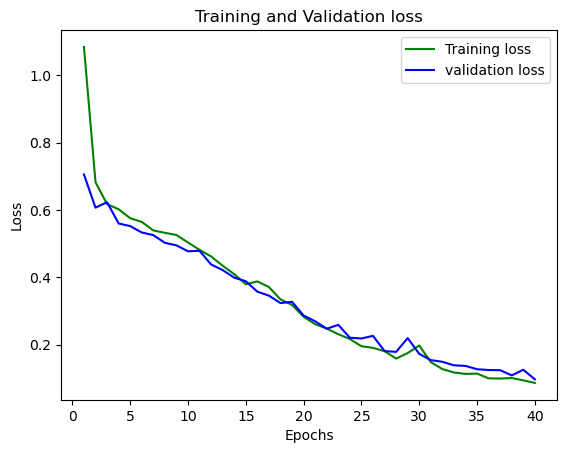

In [83]:
loss_train = train_result.history['loss']
loss_val = train_result.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# The training Accuracy is 1

# The test Accuracy is 0.9750


# Overfitting is not happening